In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import folium
from folium import plugins
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_csv("sf_business_cleaned.csv")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [239]:
df.tail().T

,224502,224503,224504,224505,224506
owner_number,1.2083e+06,1.2083e+06,1.2083e+06,1.2083e+06,1.2083e+06
business_number,1,1,1,1,1
location_number,1,1,1,1,1
owner_name,Chen-Hsin Yang,Chen-Hsin Yang,Ly Chau Nhat,Tao Alex,Windfall Data Inc.
business_name,Chen-Hsin Yang,Chen-Hsin Yang,Connection Courier Company,Asahiru,"Windfall Data, Inc."
street_address,2310 46th Ave,2310 46th Ave,339 Head St,1325 9th Ave,430 Pacific Ave
city,san francisco,san francisco,san francisco,san francisco,san francisco
state,CA,CA,CA,CA,CA
zipcode,94116,94116,94132,94122,94133
latlong,NaN,NaN,NaN,NaN,NaN


## Business Categories

In [5]:
df.naics_code.value_counts()

Real Estate and Rental and Leasing Services         23861
Professional, Scientific, and Technical Services    22230
Construction                                        14727
Retail Trade                                        11968
Food Services                                       10685
Private Education and Health Services                7209
Arts, Entertainment, and Recreation                  6900
Accommodations                                       6523
Transportation and Warehousing                       6178
Multiple                                             4364
Financial Services                                   4030
Certain Services                                     3982
Information                                          3562
Administrative and Support Services                  3281
Wholesale Trade                                      3152
Manufacturing                                        1850
Insurance                                             671
Utilities     

In [6]:
df.dtypes

owner_number               float64
business_number              int64
location_number              int64
owner_name                  object
business_name               object
street_address              object
city                        object
state                       object
zipcode                    float64
latlong                     object
neighborhood                object
business_start              object
business_end                object
location_start              object
location_end                object
naics_code                  object
lic_code                    object
parking_tax                   bool
transient_occupancy_tax       bool
dtype: object

### Null value count in each column

In [7]:
df.isna().sum()

owner_number                    0
business_number                 0
location_number                 0
owner_name                      0
business_name                   0
street_address                  3
city                            2
state                           0
zipcode                        92
latlong                     60744
neighborhood                79315
business_start                  0
business_end               163853
location_start                  0
location_end               142075
naics_code                  89113
lic_code                   211494
parking_tax                     0
transient_occupancy_tax         0
dtype: int64

### Convert date fields into datetime type 

In [240]:
df.business_start =  pd.to_datetime(df.business_start)

df.location_start = pd.to_datetime(df.location_start)

df.business_end[df.business_end.isna()] = pd.to_datetime('today')

df.location_end[df.location_end.isna()] = pd.to_datetime('today')

df.business_end = pd.to_datetime(df.business_end)

df.location_end = pd.to_datetime(df.location_end)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
df.dtypes

owner_number                      float64
business_number                     int64
location_number                     int64
owner_name                         object
business_name                      object
street_address                     object
city                               object
state                              object
zipcode                           float64
latlong                            object
neighborhood                       object
business_start             datetime64[ns]
business_end               datetime64[ns]
location_start             datetime64[ns]
location_end               datetime64[ns]
naics_code                         object
lic_code                           object
parking_tax                          bool
transient_occupancy_tax              bool
dtype: object

### Duration of business-location operation 

In [241]:
df["business_duration_days"] = (df.business_end - df.business_start).dt.days
df["location_duration_days"] = (df.location_end - df.location_start).dt.days

In [14]:
df.tail().T

,224502,224503,224504,224505,224506
owner_number,1.2083e+06,1.2083e+06,1.2083e+06,1.2083e+06,1.2083e+06
business_number,1,1,1,1,1
location_number,1,1,1,1,1
owner_name,Chen-Hsin Yang,Chen-Hsin Yang,Ly Chau Nhat,Tao Alex,Windfall Data Inc.
business_name,Chen-Hsin Yang,Chen-Hsin Yang,Connection Courier Company,Asahiru,"Windfall Data, Inc."
street_address,2310 46th Ave,2310 46th Ave,339 Head St,1325 9th Ave,430 Pacific Ave
city,san francisco,san francisco,san francisco,san francisco,san francisco
state,CA,CA,CA,CA,CA
zipcode,94116,94116,94132,94122,94133
latlong,NaN,NaN,NaN,NaN,NaN


In [242]:
df = df[df.city == "san francisco"]

### Categories with the most long running businesses

In [243]:
business_duration = df.groupby('naics_code').agg({'business_duration_days' : ["median" , "std", "mean"]})

In [244]:
business_duration.reset_index(inplace=True)

business_duration.sort_values(by = ('business_duration_days', 'median'), ascending = False, inplace=True)
business_duration["naics_code"]

13         Real Estate and Rental and Leasing Services
17                                     Wholesale Trade
3                                     Certain Services
4                                         Construction
8                                            Insurance
15                      Transportation and Warehousing
11               Private Education and Health Services
1                  Administrative and Support Services
14                                        Retail Trade
5                                   Financial Services
9                                        Manufacturing
12    Professional, Scientific, and Technical Services
2                  Arts, Entertainment, and Recreation
6                                        Food Services
7                                          Information
16                                           Utilities
10                                            Multiple
0                                       Accommodations
Name: naic

In [245]:
business_duration

naics_code business_duration_days  \
                                                                     median   
13       Real Estate and Rental and Leasing Services                 4416.0   
17                                   Wholesale Trade                 3959.0   
3                                   Certain Services                 3335.5   
4                                       Construction                 3327.0   
8                                          Insurance                 3259.0   
15                    Transportation and Warehousing                 3208.0   
11             Private Education and Health Services                 3183.0   
1                Administrative and Support Services                 3158.0   
14                                      Retail Trade                 3137.0   
5                                 Financial Services                 2980.0   
9                                      Manufacturing                 2860.0   
12  Professional, Scientific, and Technical Services                 2859.0   
2                Arts, Entertainment, and Recreation                 2608.0   
6                                      Food Services                 2228.0   
7                                        Information                 2133.0   
16                                         Utilities                 1949.0   
10                                          Multiple                 1216.0   
0                                     Accommodations                  775.5   

                              
            std         mean  
13  5967.997031  6598.782196  
17  4486.988641  5245.321469  
3   4461.939786  4647.300612  
4   3745.451358  4320.101077  
8   5019.179406  5040.672441  
15  2888.459706  3210.334972  
11  4212.075140  4459.341911  
1   5623.807500  5362.312632  
14  4391.565819  4574.515352  
5   3568.356855  4073.924636  
9   4779.603683  4593.357278  
12  3674.533731  4022.124755  
2   3526.796101  3720.276553  
6   3606.271760  3521.187243  
7   3151.937335  3090.420569  
16  2442.147631  2754.097345  
10  3475.261819  2630.824164  
0   3537.453114  2034.208360

In [246]:
import seaborn

sns.set(rc={'figure.figsize':(11.7,8.27)})

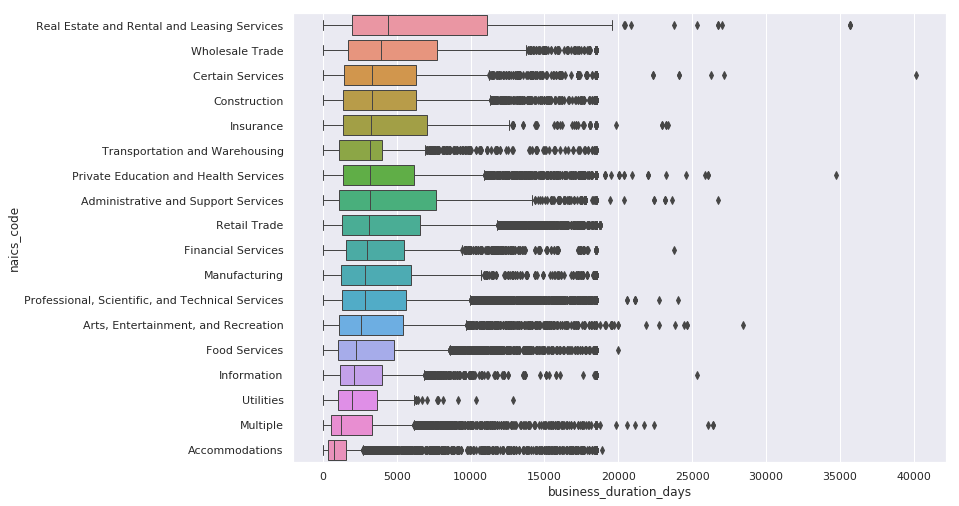

In [247]:
sns.boxplot(y="naics_code", x="business_duration_days", data=df, orient='h', linewidth=1, whis = 1, order = business_duration["naics_code"]);


In [248]:
business_catg_cnt = df.groupby(['naics_code']).agg({"business_name" : [pd.Series.nunique]})
business_catg_cnt.reset_index(inplace=True)
business_catg_cnt.sort_values(by = ('business_name', 'nunique'), ascending = False )

,naics_code,business_name
,,nunique
13,Real Estate and Rental and Leasing Services,19430
12,"Professional, Scientific, and Technical Services",17413
14,Retail Trade,9408
6,Food Services,8081
0,Accommodations,5979
2,"Arts, Entertainment, and Recreation",5737
11,Private Education and Health Services,5681
4,Construction,5610
10,Multiple,3608


In [249]:
survived_180days = \
df[df.location_duration_days > 360].groupby(['naics_code']).agg({"business_name" : [pd.Series.nunique]})
survived_180days.reset_index(inplace=True)

survivability = pd.merge(business_catg_cnt, survived_180days, on = "naics_code", suffixes=('_all', '_survived_180'))

survivability["survivability_ratio"] = \
survivability[('business_name_survived_180', 'nunique' )] / survivability[('business_name_all', 'nunique')]


survivability.sort_values(by = "survivability_ratio", ascending = False )


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,naics_code,business_name_all,business_name_survived_180,survivability_ratio
,,nunique,nunique,
13,Real Estate and Rental and Leasing Services,19430,18602,0.957385
5,Financial Services,3062,2870,0.937296
17,Wholesale Trade,2345,2190,0.933902
16,Utilities,94,87,0.925532
12,"Professional, Scientific, and Technical Services",17413,16096,0.924367
9,Manufacturing,1300,1200,0.923077
11,Private Education and Health Services,5681,5216,0.918148
8,Insurance,526,482,0.916350
7,Information,2694,2464,0.914625


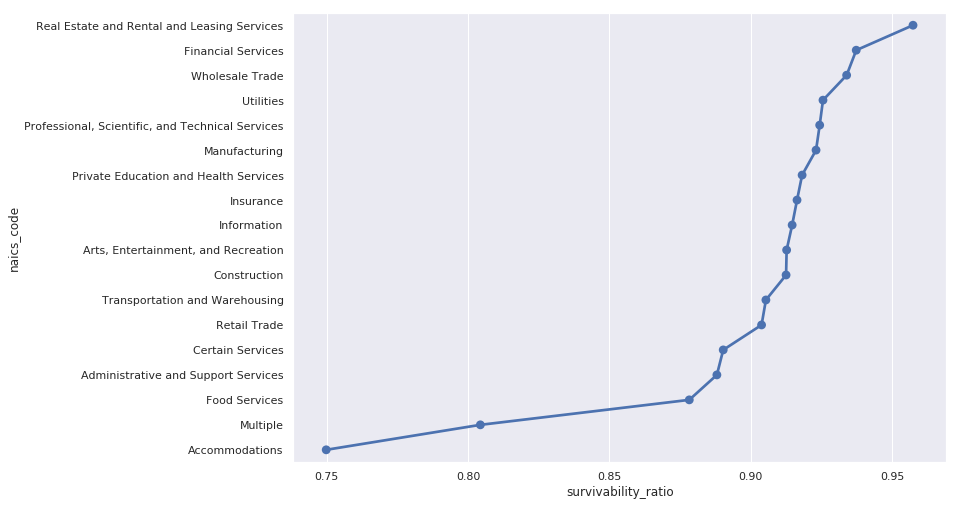

In [250]:
sns.pointplot(x = "survivability_ratio", y = "naics_code", \
            data = survivability.sort_values(by = "survivability_ratio", ascending = False ))

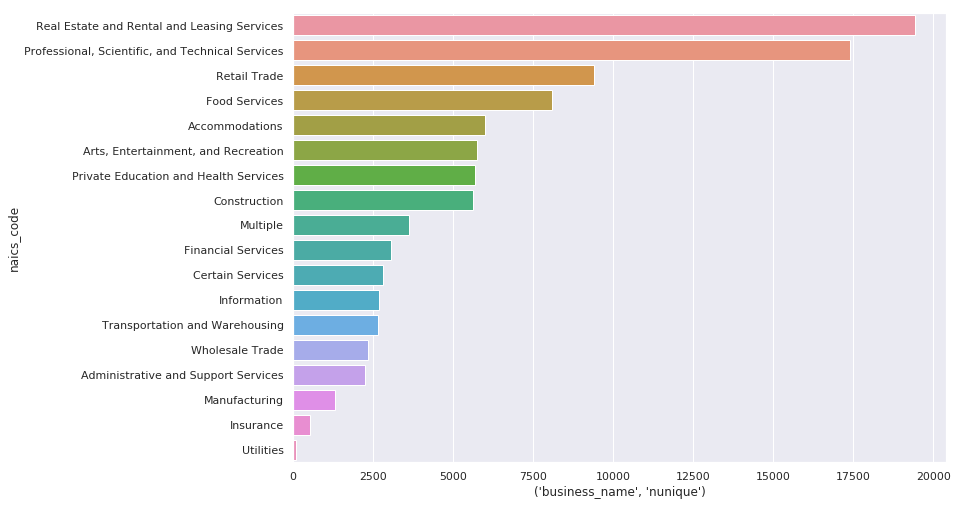

In [491]:
sns.barplot(x = ('business_name', 'nunique'), y = "naics_code", \
            data = business_catg_cnt.sort_values(by = ('business_name', 'nunique'), ascending = False ))

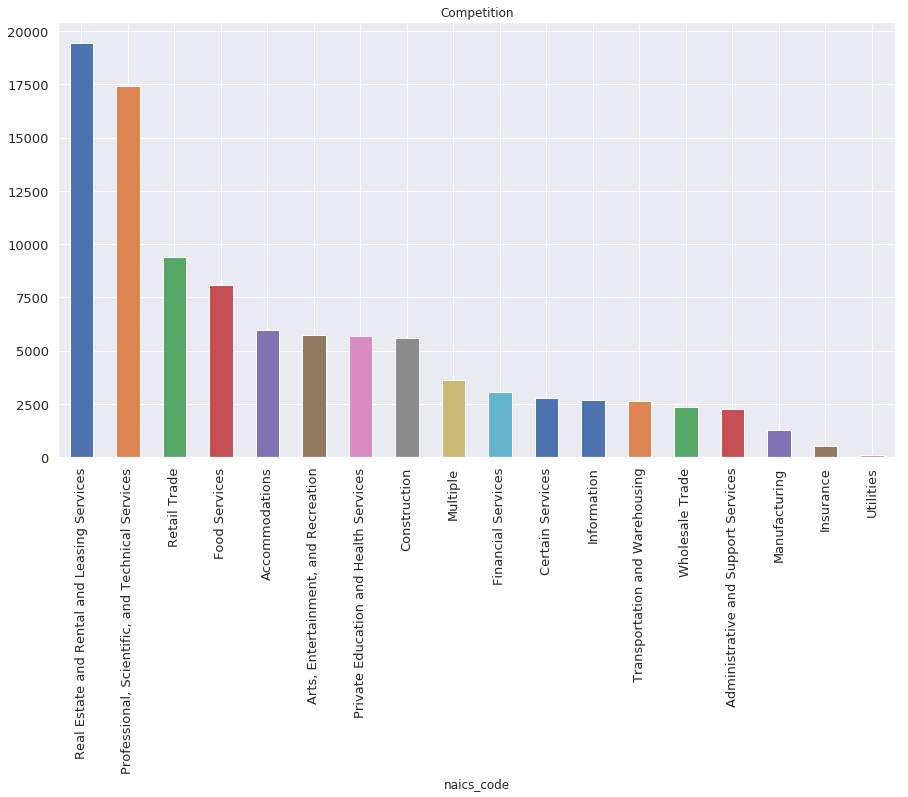

In [251]:
(business_catg_cnt
 .sort_values(by = ('business_name', 'nunique'), ascending = False )
 .plot("naics_code", ('business_name', 'nunique'), 
      kind = 'bar', 
      figsize = (15, 8), 
      fontsize = 13, 
      legend = False, 
      title = "Competition"))

### Neighborhoods with most long running businesses

In [252]:
location_duration = df.groupby('neighborhood').agg({'location_duration_days' : ["median" , "std", "mean"]})

In [253]:
location_duration.sort_values(by = ('location_duration_days', 'median'), ascending = False, )

location_duration_days               \
                                               median          std   
neighborhood                                                         
McLaren Park                                   3188.0  2208.482343   
Lincoln Park                                   3160.0  4374.328831   
Golden Gate Park                               2765.0  3053.476026   
Presidio Heights                               2680.0  4325.191342   
Japantown                                      2589.0  4427.555130   
Inner Richmond                                 2532.5  4453.671289   
Seacliff                                       2526.5  4952.764981   
Russian Hill                                   2511.0  4778.574826   
Outer Richmond                                 2458.0  4313.751256   
Marina                                         2453.0  4497.535713   
Chinatown                                      2446.0  4613.655385   
Inner Sunset                                   2416.0  4219.220842   
Pacific Heights                                2406.0  4376.228253   
Nob Hill                                       2329.0  4489.858007   
Lone Mountain/USF                              2315.0  4197.451018   
North Beach                                    2307.0  4297.679931   
Sunset/Parkside                                2300.0  3589.360699   
West of Twin Peaks                             2292.0  3410.491221   
Haight Ashbury                                 2223.5  4136.275382   
Twin Peaks                                     2184.5  4150.860286   
Tenderloin                                     2174.0  3608.755458   
Portola                                        2158.5  3032.641258   
Western Addition                               2147.5  3670.829297   
Bayview Hunters Point                          2111.5  3576.641265   
Outer Mission                                  2073.5  3576.556638   
Mission                                        2073.0  3832.713568   
Oceanview/Merced/Ingleside                     2036.0  2764.441790   
Noe Valley                                     2036.0  3827.764137   
Treasure Island                                1999.5  1435.439708   
Financial District/South Beach                 1949.0  3018.192982   
Hayes Valley                                   1949.0  3620.155503   
Castro/Upper Market                            1933.0  3681.286730   
Glen Park                                      1926.5  3257.631206   
Bernal Heights                                 1916.0  3131.029454   
Visitacion Valley                              1905.0  3028.715037   
Excelsior                                      1887.0  3156.143309   
Lakeshore                                      1779.0  3161.223652   
Potrero Hill                                   1762.5  3241.824775   
South of Market                                1706.0  3294.878069   
Mission Bay                                    1629.0  2616.168041   
Presidio                                       1601.0  1946.030407   

                                             
                                       mean  
neighborhood                                 
McLaren Park                    3337.571429  
Lincoln Park                    4479.086957  
Golden Gate Park                3418.608696  
Presidio Heights                4081.666819  
Japantown                       3895.627353  
Inner Richmond                  4088.639118  
Seacliff                        4022.186275  
Russian Hill                    4244.020428  
Outer Richmond                  3880.801854  
Marina                          3988.244475  
Chinatown                       4076.280132  
Inner Sunset                    3830.706326  
Pacific Heights                 3901.610266  
Nob Hill                        3885.615898  
Lone Mountain/USF               3646.194121  
North Beach                     3729.303409  
Sunset/Parkside                 3360.680079  
West of Twin Peaks            

In [254]:
sf_coords  = df["latlong"][~df.latlong.isna()].apply(lambda x : eval(x))

In [255]:
df.loc[~df["latlong"].isna(), "lat"] = sf_coords.apply(lambda x: x[0])
df.loc[~df["latlong"].isna(), "lon"] = sf_coords.apply(lambda x: x[1])

In [256]:
sf_coords = df[~df["latlong"].isna()][["lat", "lon"]].as_matrix()
mean_coords = sf_coords.mean(axis = 0)
df.loc[df["latlong"].isna(), "lat"] = 0
df.loc[df["latlong"].isna(), "lon"] = 0

In [257]:
df.tail()

,owner_number,business_number,location_number,owner_name,business_name,street_address,city,state,zipcode,latlong,...,location_start,location_end,naics_code,lic_code,parking_tax,transient_occupancy_tax,business_duration_days,location_duration_days,lat,lon
224502,1208297.0,1,1,Chen-Hsin Yang,Chen-Hsin Yang,2310 46th Ave,san francisco,CA,94116.0,NaN,...,2018-08-12,2019-05-04,Accommodations,NaN,False,True,265,265,0.0,0.0
224503,1208298.0,1,1,Chen-Hsin Yang,Chen-Hsin Yang,2310 46th Ave,san francisco,CA,94116.0,NaN,...,2018-08-12,2019-05-04,Accommodations,NaN,False,True,265,265,0.0,0.0
224504,1208299.0,1,1,Ly Chau Nhat,Connection Courier Company,339 Head St,san francisco,CA,94132.0,NaN,...,2018-12-01,2019-05-04,Transportation and Warehousing,NaN,False,False,9836,154,0.0,0.0
224505,1208300.0,1,1,Tao Alex,Asahiru,1325 9th Ave,san francisco,CA,94122.0,NaN,...,2018-12-26,2019-05-04,Food Services,NaN,False,False,939,129,0.0,0.0
224506,1208301.0,1,1,Windfall Data Inc.,"Windfall Data, Inc.",430 Pacific Ave,san francisco,CA,94133.0,NaN,...,2016-07-11,2019-05-04,Information,NaN,False,False,1027,1027,0.0,0.0


In [44]:
import geopandas as gpd

In [ ]:
gdf = gpd.read_file("tl_2017_06075_roads.shp")

In [ ]:
gdf.tail()

In [258]:
def map_points(df, lat_col='latitude', lon_col='longitude', mean_coords = None, zoom_start=12, \
                plot_points=False, pt_radius=15, \
                draw_heatmap=True, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """

    ## center map in the middle of points center in
    if mean_coords is None: 
        middle_lat = df[lat_col].median()
        middle_lon = df[lon_col].median()
        mean_coords = [middle_lat, middle_lon]

    curr_map = folium.Map(location=mean_coords,
                          zoom_start=zoom_start)

    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = df[cols_to_pull].as_matrix()
        curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map

In [260]:
selected_catg = 'Real Estate and Rental and Leasing Services'
curr_map = map_points(df[df.naics_code == selected_catg], "lat", "lon", heat_map_radius=10)
curr_map

In [216]:
curr_map.save("heatmap.html")

In [414]:
shp = gpd.read_file('geo_export_39010e26-0a56-45fa-9d5c-e956c3d4fddf.shp')
shp.tail()

,accepted,classcode,cnn,cnntext,district,f_node_cnn,jurisdicti,layer,lf_fadd,lf_toadd,...,oneway,rt_fadd,rt_toadd,st_type,street,street_gc,streetname,t_node_cnn,zip_code,geometry
16236,Y,5,3155002.0,3155002,None,35069000.0,DPW,STREETS,721.0,763.0,...,B,722.0,768.0,None,BROADWAY,BROADWAY,BROADWAY,25066000.0,94133,LINESTRING (-122.4090400209643 37.797574666436...
16237,N,5,15212000.0,15212000,None,20170000.0,DPW,STREETS,801.0,899.0,...,B,800.0,898.0,AVE,FAIRFAX,FAIRFAX,FAIRFAX AVE,35070000.0,94124,LINESTRING (-122.379414567742 37.7352446750316...
16238,N,5,15213000.0,15213000,None,35070000.0,DPW,STREETS,901.0,999.0,...,B,900.0,998.0,AVE,FAIRFAX,FAIRFAX,FAIRFAX AVE,35016000.0,94124,LINESTRING (-122.3801278068462 37.735283366487...
16239,N,5,15214000.0,15214000,None,54359000.0,DPW,STREETS,0.0,0.0,...,B,0.0,0.0,WAY,IRONWOOD,IRONWOOD,IRONWOOD WAY,35070000.0,94124,LINESTRING (-122.380131921192 37.7349854859701...
16240,N,5,15215000.0,15215000,None,35070000.0,DPW,STREETS,0.0,0.0,...,B,0.0,0.0,WAY,IRONWOOD,IRONWOOD,IRONWOOD WAY,35018000.0,94124,LINESTRING (-122.3801278068462 37.735283366487...


In [415]:
shp["x"] = shp.geometry.centroid.map(lambda p: p.x)
shp["y"] = shp.geometry.centroid.map(lambda p: p.y)

In [416]:
shp = shp[(shp["lf_fadd"] > 0) | (shp["lf_toadd"] > 0) | (shp["rt_fadd"] > 0) | (shp["rt_toadd"] > 0)]


shp.reset_index(drop = True, inplace=True)

In [237]:
from sklearn.neighbors import KDTree


In [397]:
transit_stops = pd.read_csv("stops.txt")
transit_stops.tail()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url
3519,7945,17945,Mission st & Fremont St,,37.790261,-122.396788,,
3520,7951,17951,Herbst Rd & Skyline Blvd,,37.728516,-122.501878,,
3521,7953,17953,Geary Blvd & Masonic St,,37.782197,-122.447034,,
3522,7954,17954,Geary Blvd & Fillmore St,,37.784382,-122.432052,,
3523,7959,17959,McLaren School Turnback Point,,37.715008,-122.425047,,


In [398]:
transit_tree = KDTree(transit_stops[["stop_lat","stop_lon"]], leaf_size = 20)

In [417]:
shp["mean_dist_3_stops"] = np.mean(transit_tree.query(shp[["y", "x"]], k = 3)[0], axis = 1)

In [418]:
stop_names = [
    "," .join(transit_stops.iloc[indices]["stop_name"]) \
 for indices in transit_tree.query(shp[["y", "x"]], k = 3)[1]
]

In [419]:
shp["nearest_transit_stops"] = stop_names

In [420]:
from collections import defaultdict

d = defaultdict(list)
catgs = df[~df.naics_code.isna()]["naics_code"].unique()
for catg in catgs:
    
    distance_key_tag = "Mean Dist 10 nearest Competitors in " + catg
    survival_key_tag = "Median survival 10 nearest Competitors in " + catg
    
    b_tree = KDTree(df[df.naics_code == catg][["lat","lon"]], leaf_size = 20)
    shp[distance_key_tag] = np.mean(b_tree.query(shp[["y", "x"]], k = 10)[0], axis = 1)
    
    for arr_ind in b_tree.query(shp[["y", "x"]], k = 10)[1]:
        d[survival_key_tag].append(np.median(df.iloc[arr_ind]["location_duration_days"]))
    
        

In [421]:
neighbor_survival =  pd.DataFrame(d)
neighbor_survival.tail()

,Median survival 10 nearest Competitors in Accommodations,Median survival 10 nearest Competitors in Administrative and Support Services,"Median survival 10 nearest Competitors in Arts, Entertainment, and Recreation",Median survival 10 nearest Competitors in Certain Services,Median survival 10 nearest Competitors in Construction,Median survival 10 nearest Competitors in Financial Services,Median survival 10 nearest Competitors in Food Services,Median survival 10 nearest Competitors in Information,Median survival 10 nearest Competitors in Insurance,Median survival 10 nearest Competitors in Manufacturing,Median survival 10 nearest Competitors in Multiple,Median survival 10 nearest Competitors in Private Education and Health Services,"Median survival 10 nearest Competitors in Professional, Scientific, and Technical Services",Median survival 10 nearest Competitors in Real Estate and Rental and Leasing Services,Median survival 10 nearest Competitors in Retail Trade,Median survival 10 nearest Competitors in Transportation and Warehousing,Median survival 10 nearest Competitors in Utilities,Median survival 10 nearest Competitors in Wholesale Trade
15248,10789.0,3924.0,10624.0,7054.0,16666.0,7497.0,17930.5,8364.5,17090.0,11794.5,12627.0,10694.0,15146.0,12666.5,14855.5,14413.0,11337.0,7911.5
15249,18477.0,10590.5,13439.0,17423.5,5053.5,11080.0,16090.5,18477.0,6912.5,12005.5,6749.5,11977.5,13269.5,7029.5,17507.0,12044.0,5458.0,6817.5
15250,18477.0,10816.0,13439.0,16875.5,11698.0,14165.0,16610.0,18477.0,6912.5,12005.5,6749.5,9619.5,15707.0,10633.5,14114.5,12044.0,4209.0,6818.0
15251,15564.0,6188.0,12910.5,7810.0,16467.5,7497.0,13336.5,13669.5,6940.5,6998.0,11800.0,8668.5,11610.0,11263.5,14946.0,12725.0,12877.0,17958.0
15252,15564.0,6188.0,12910.5,7810.0,16527.0,7497.0,17341.5,13669.5,6940.5,9100.5,4012.5,8668.5,11610.0,11263.5,15320.5,12725.0,12877.0,16800.5


In [437]:
combined_shp = pd.concat([shp, neighbor_survival], axis = 1)

In [457]:
combined_shp.geometry = [Point(xy) for xy in zip(combined_shp.x, combined_shp.y)]

In [438]:
combined_shp.tail().T

,15248,15249,15250,15251,15252
accepted,N,Y,Y,N,N
classcode,5,5,5,5,5
cnn,1.5211e+07,3.155e+06,3.155e+06,1.5212e+07,1.5213e+07
cnntext,15211000,3155001,3155002,15212000,15213000
district,None,None,None,None,None
f_node_cnn,3.5067e+07,2.5057e+07,3.5069e+07,2.017e+07,3.507e+07
jurisdicti,DPW,DPW,DPW,DPW,DPW
layer,STREETS,STREETS,STREETS,STREETS,STREETS
lf_fadd,901,701,721,801,901
lf_toadd,999,719,763,899,999


In [519]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


## Scoring Businesses by Category

In [502]:
from sklearn import preprocessing


In [510]:
transit_scaled = 1 - min_max_scaler.fit_transform(combined_shp[["mean_dist_3_stops"]])

for catg in catgs:
    
    distance_key_tag = "Mean Dist 10 nearest Competitors in " + catg
    survival_key_tag = "Median survival 10 nearest Competitors in " + catg
    
    dist_scaled = 1 - min_max_scaler.fit_transform(combined_shp[[distance_key_tag]])
    survival_scaled = min_max_scaler.fit_transform(combined_shp[[survival_key_tag]])
    combined_shp["Score of " + catg] = (dist_scaled + survival_scaled + transit_scaled).reshape(-1)

In [520]:
combined_shp.sort_values(by = "Score of " + selected_catg , ascending= False).iloc[0:1].T

,9289
accepted,Y
classcode,3
cnn,6.0701e+06
cnntext,6070101
district,None
f_node_cnn,2.7483e+07
jurisdicti,DPW
layer,STREETS
lf_fadd,4951
lf_toadd,4999


In [521]:
roads_json = combined_shp.to_json()

In [522]:
middle_lat = combined_shp.y.median()
middle_lon = combined_shp.x.median()
mean_coords = [middle_lat, middle_lon]
curr_map = folium.Map(location=mean_coords,
                          zoom_start=12)


In [483]:

from folium.plugins import MarkerCluster

In [536]:
width, height = 310,110
popups, locations = [], []
for idx, row in combined_shp.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    name = row.streetname
    transit_stops = row["nearest_transit_stops"]
    table = f"""
    <!DOCTYPE html>
    <html>
    <head>
    <style>
    table {{
        width:100%;
    }}
    table, th, td {{
        border: 1px solid black;
        border-collapse: collapse;
    }}
    th, td {{
        padding: 5px;
        text-align: left;
    }}
    table#t01 tr:nth-child(odd) {{
        background-color: #eee;
    }}
    table#t01 tr:nth-child(even) {{
       background-color:#fff;
    }}
    </style>
    </head>
    <body>

    <table id="t01">
      <tr>
        <td>Name</td>
        <td>{name}</td>
      </tr>
      <tr>
        <td>Nearest Transit Stops</td>
        <td>{transit_stops}</td>
      </tr>
    """


    for catg in catgs:
        score_tag = 'Score of ' + catg
    
        text = \
        f"""
          <tr>
            <td>"Score of starting {catg} business"\
        
            </td>
            <td>{row[score_tag]}</td>
        </tr
        """
        table += text

    table += \
    """
    </table>
    </body>
    </html>
    """
        
    
    popup = folium.Popup(table)
    popups.append(popup)
    
h = folium.FeatureGroup(name='Hydroelectric')
h.add_children(MarkerCluster(locations=locations, popups=popups))
curr_map.add_children(h)

KeyboardInterrupt: 

In [ ]:
curr_map.save("rd_pts_v2.html")